# NBFI Vehicle loan repayment Analyze

#Additionally library 

missingno

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import missingno as msno
from tensorflow import keras
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')

C:\Users\Chloe\AppData\Local\Temp\ipykernel_16228\66832030.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')


## EDA 

In [1]:
df['Client_Occupation'].value_counts()

NameError: name 'df' is not defined

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [4]:
data.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

<Axes: >

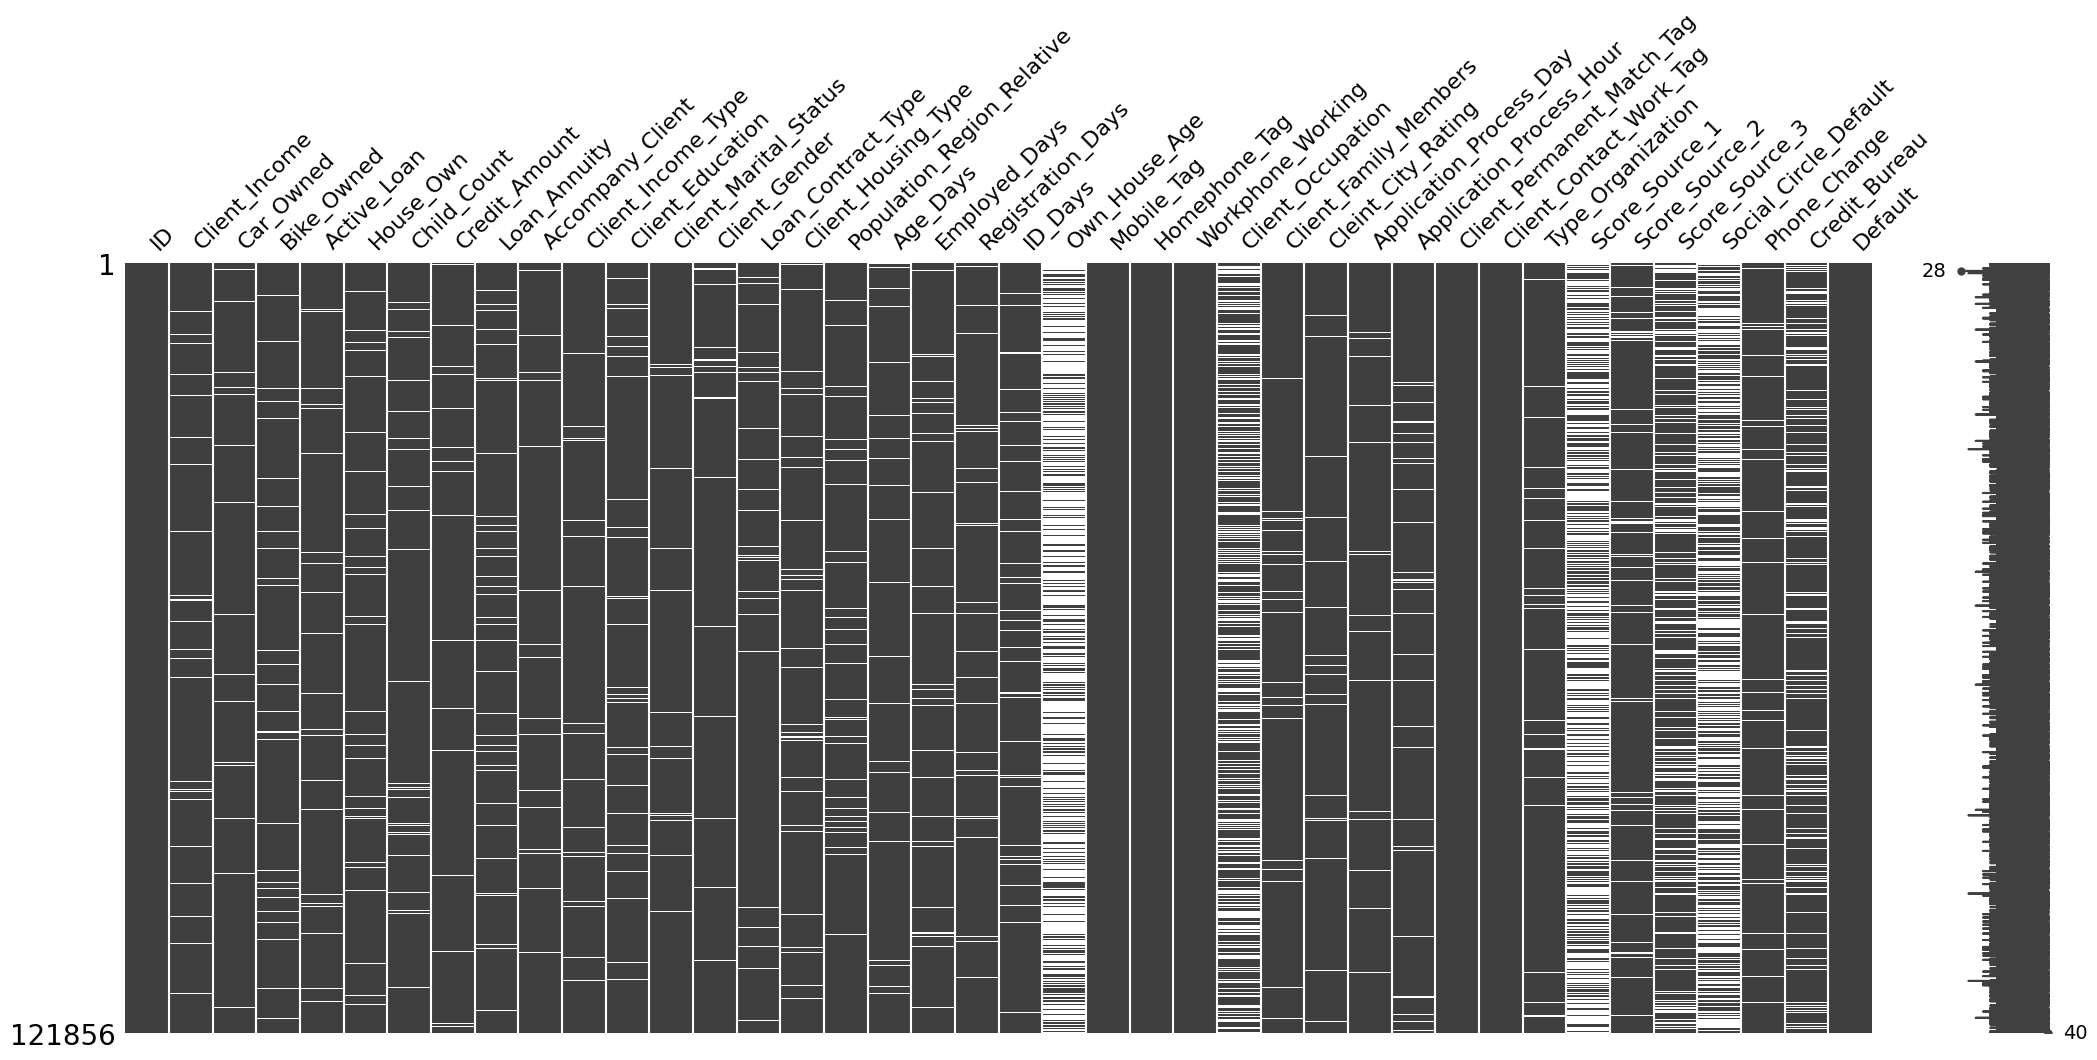

In [5]:
msno.matrix(data)

In [6]:
data['Client_Income'] =data.Client_Income.replace('$', 0)

In [7]:
data = data.astype({'Client_Income':float})

In [8]:
data['log_Client_Income'] = np.log1p(data['Client_Income'])

In [9]:
data.groupby('Default').agg({'Client_Income':('mean', 'median', 'std','var', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75))})

Client_Income                                                  \
                 mean   median           std           var <lambda_0>   
Default                                                                 
0        16936.813918  14850.0  11777.511829  1.387098e+08    11250.0   
1        16025.019104  13500.0   8318.928690  6.920457e+07    11250.0   

                    
        <lambda_1>  
Default             
0          20250.0  
1          19350.0

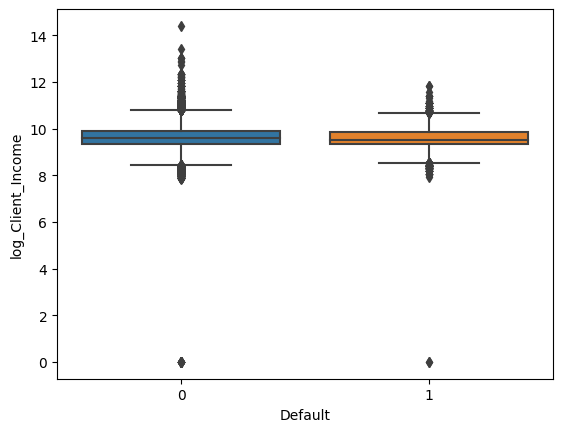

In [10]:
sns.boxplot(data=data, x='Default', y='log_Client_Income')
plt.show()

In [11]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'log_Client_Income'],
      dtype='object')

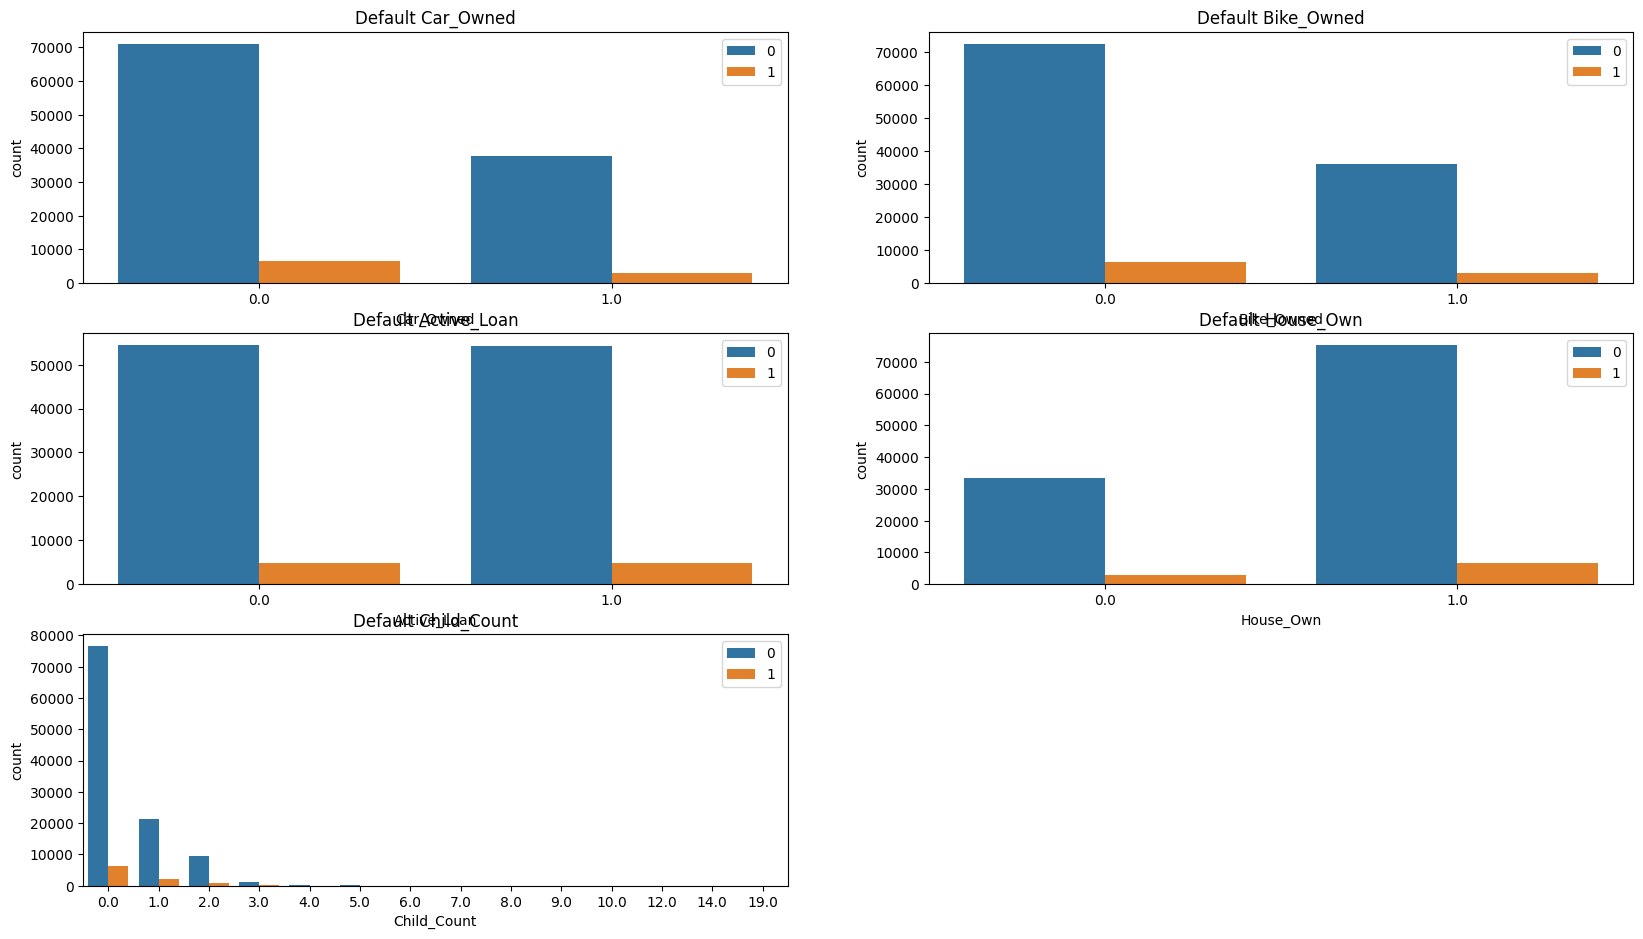

In [12]:
plt.figure(figsize=(20,15))
for i in range(2,7):
    plt.subplot(4,2,i-1)
    sns.countplot(data=data, x=data.columns[i], hue='Default',)
    plt.legend()
    plt.title(f'Default {data.columns[i]}')
plt.show()


In [13]:
data[data.House_Own.isnull()]['Own_House_Age']


1          0.0
129       13.0
140        NaN
153        4.0
186        6.0
          ... 
121725     NaN
121745     NaN
121795     NaN
121799     2.0
121832     NaN
Name: Own_House_Age, Length: 3661, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [15]:
data.isnull().sum()[data.isnull().sum()>0]

Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour       3663
Type_Organization              3609
Score_Source_1              

In [16]:
categorical_columns = ['ID',
                       'Car_Owned',
                       'Bike_Owned',
                       'Active_Loan',
                       'House_Own',
                       'Child_Count',
                       'Client_Income_Type',
                       'Client_Education',
                       'Client_Marital_Status',
                       'Client_Gender',
                       'Loan_Contract_Type',
                       'Client_Housing_Type',
                       'Mobile_Tag',
                       'Homephone_Tag',
                       'Workphone_Working',
                       'Client_Occupation',
                       'Cleint_City_Rating',
                       'Application_Process_Day',
                       'Application_Process_Hour',
                       'Client_Permanent_Match_Tag',
                       'Client_Contact_Work_Tag',
                       'Type_Organization'
                       ]


In [17]:
len(categorical_columns)

22

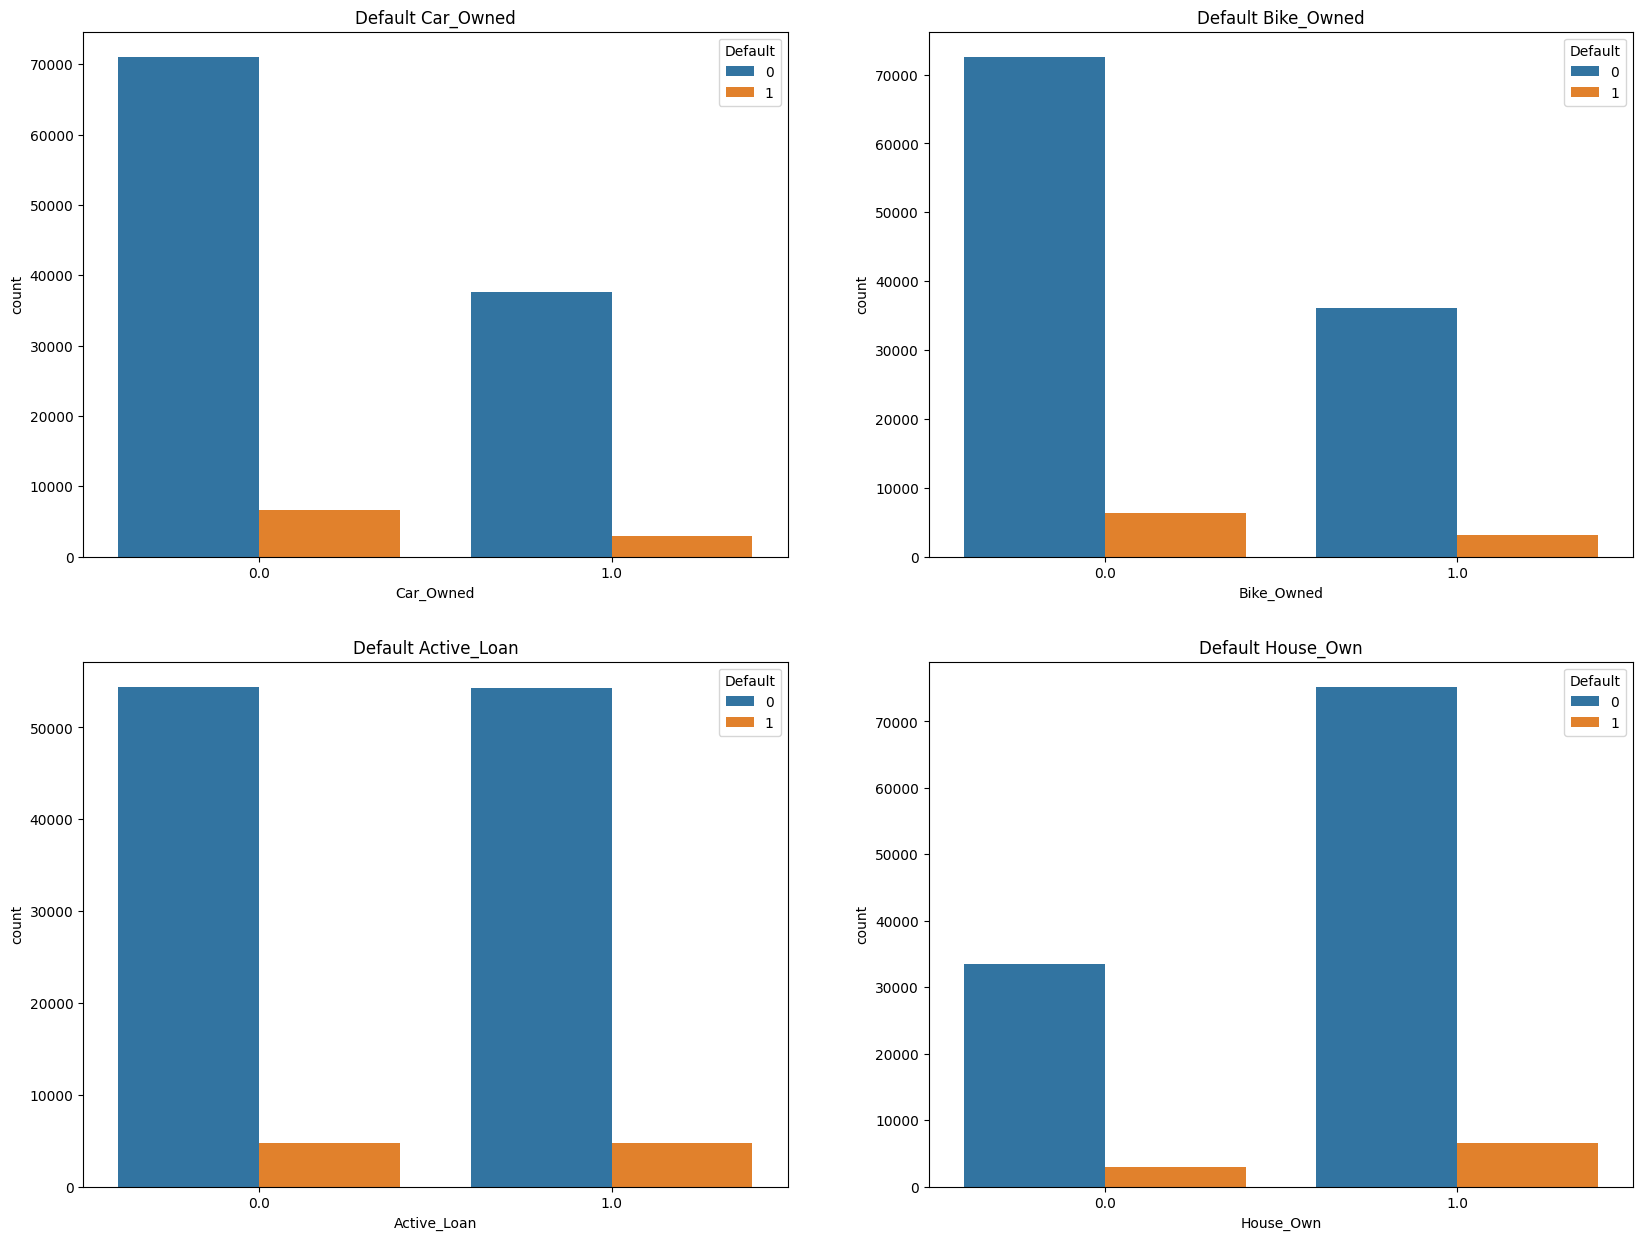

In [20]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[1:5]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


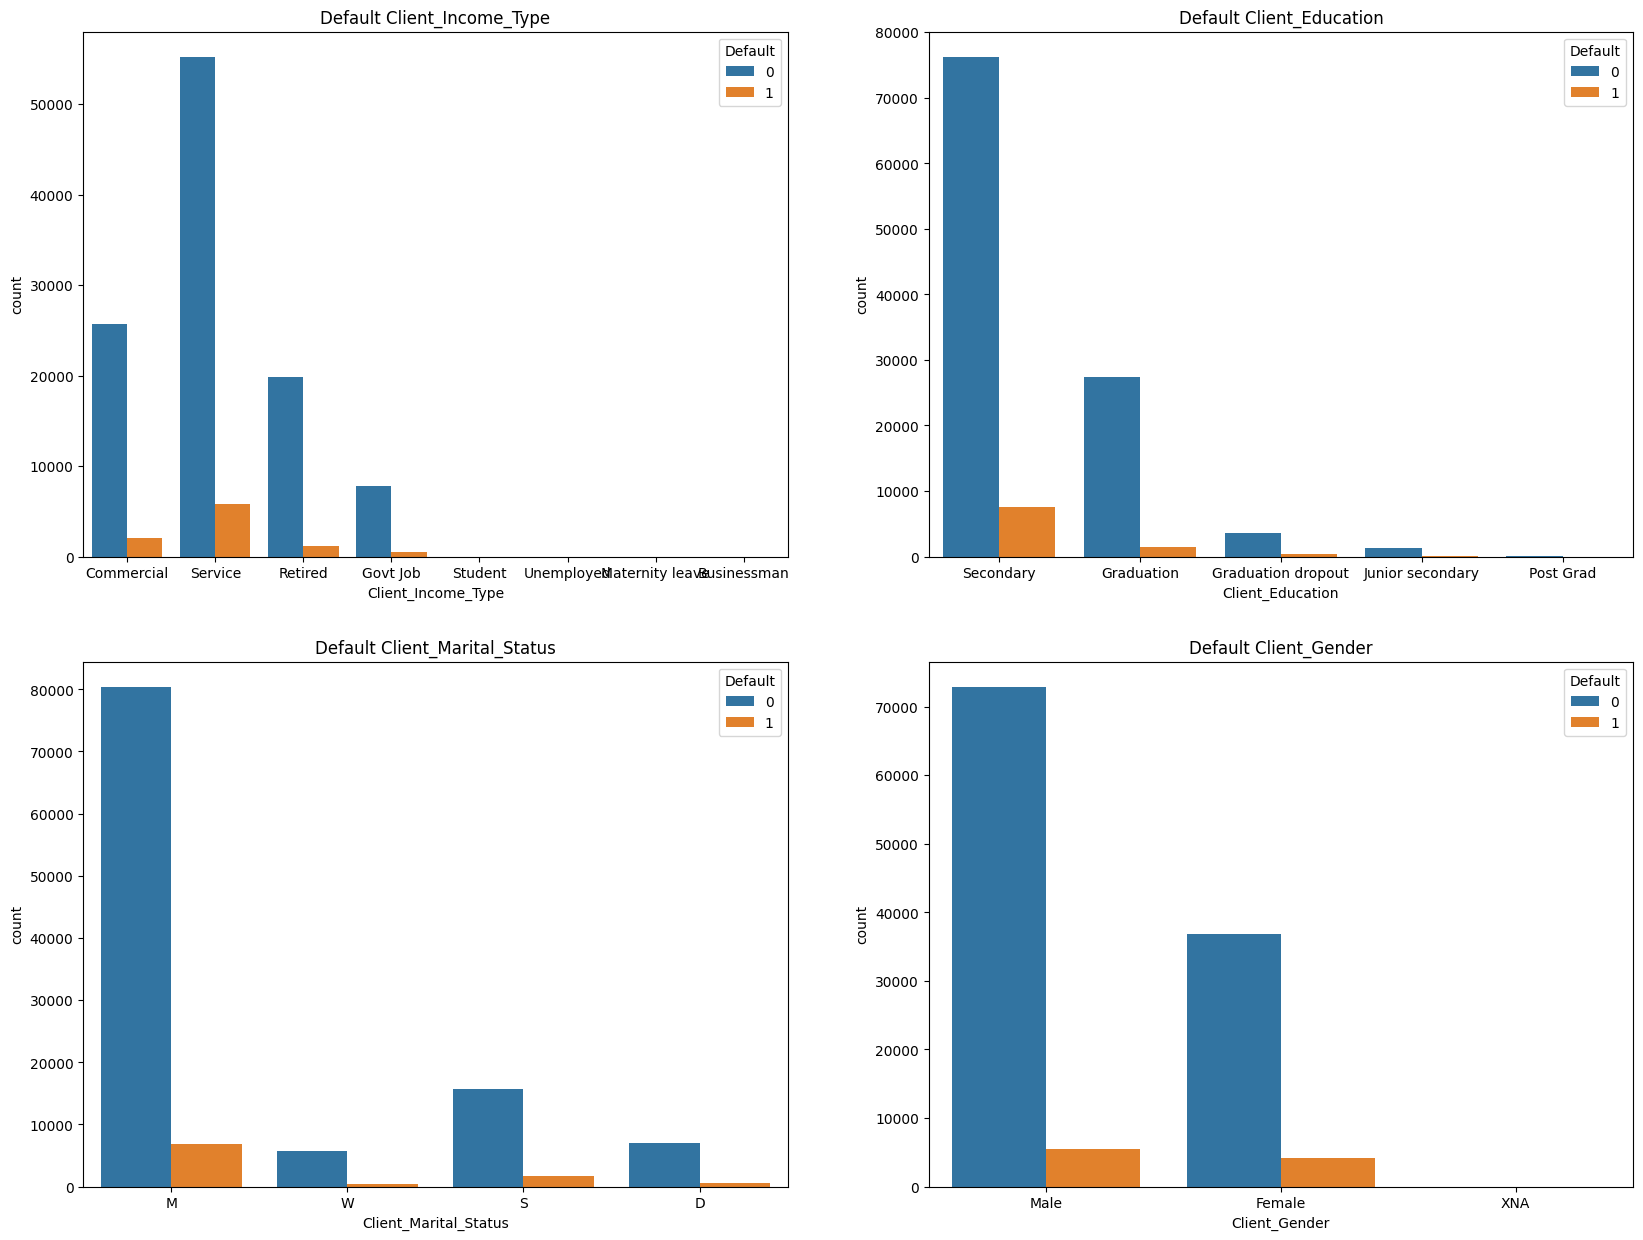

In [21]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[6:10]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


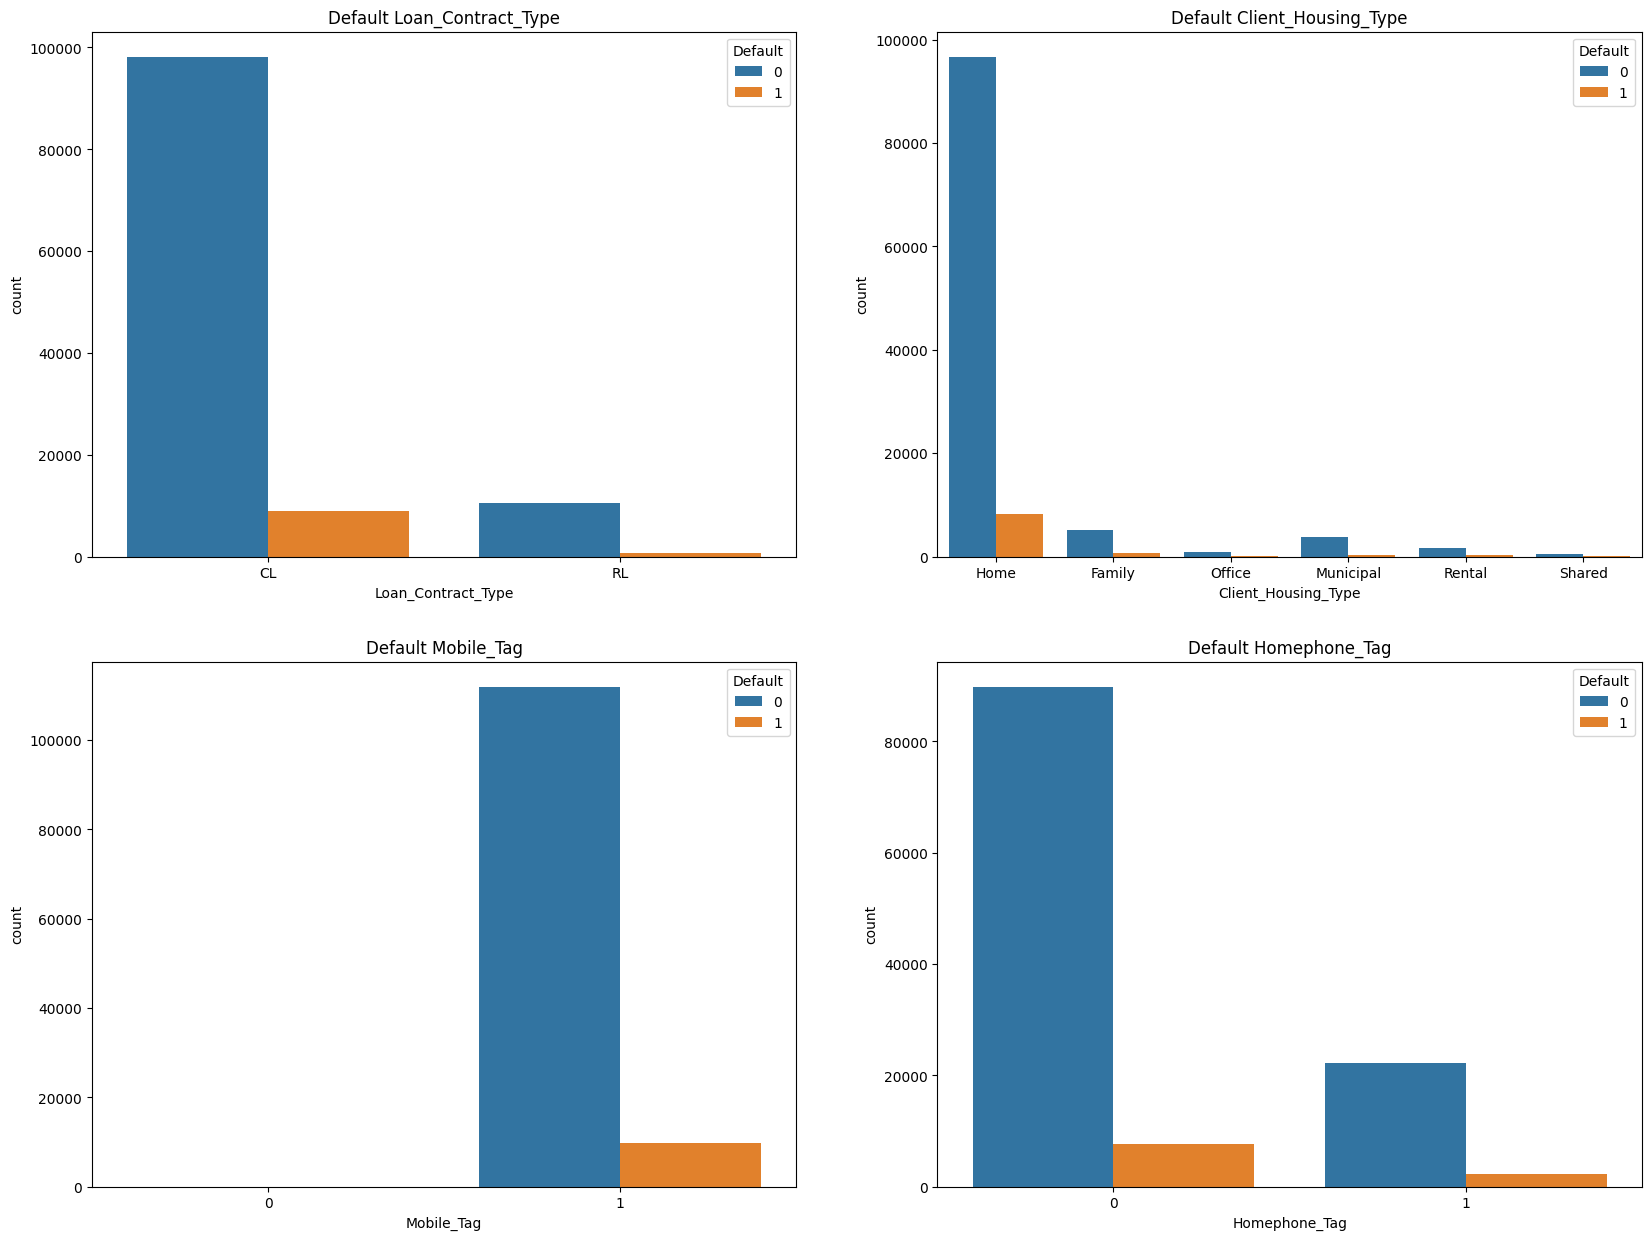

In [22]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[10:14]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


Mobile Tag는 널값이 없고 다 1이므로 아무런 영향이 없으므로 열을 삭제

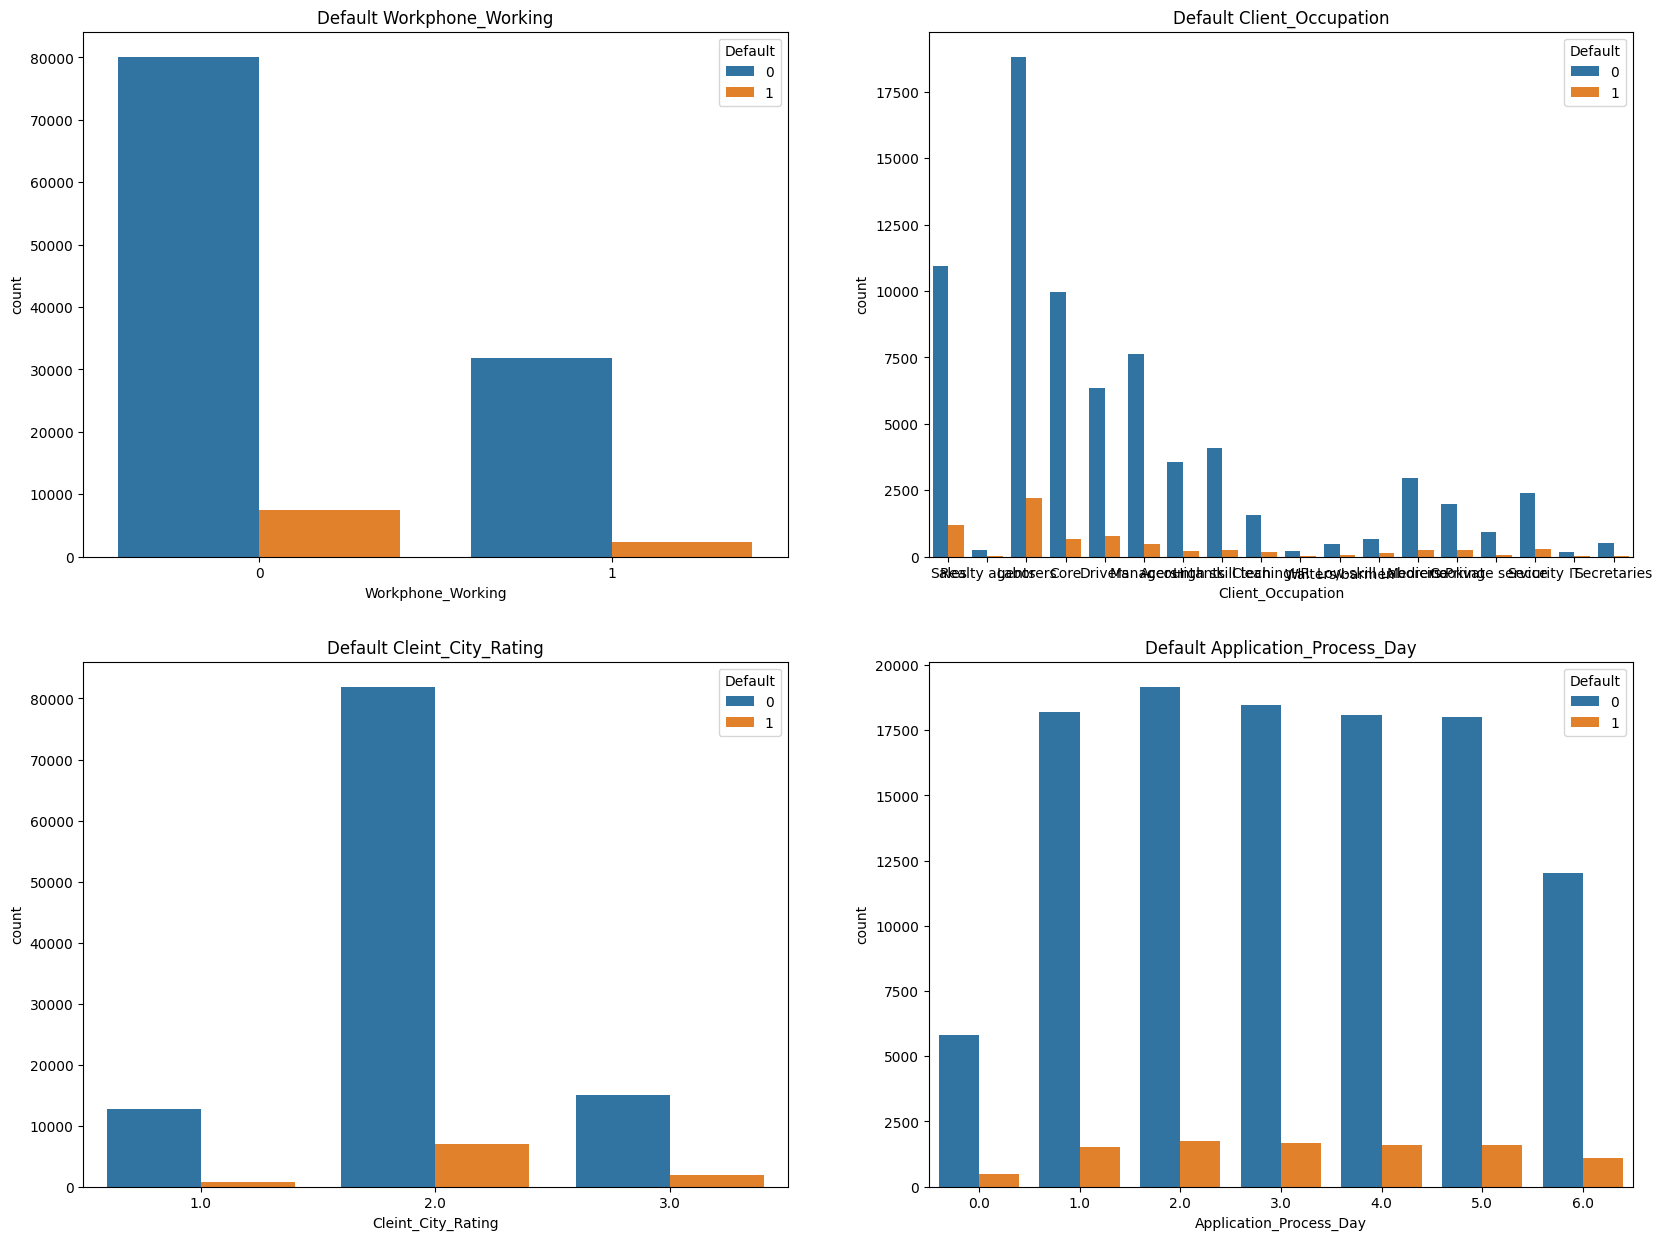

In [23]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[14:18]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


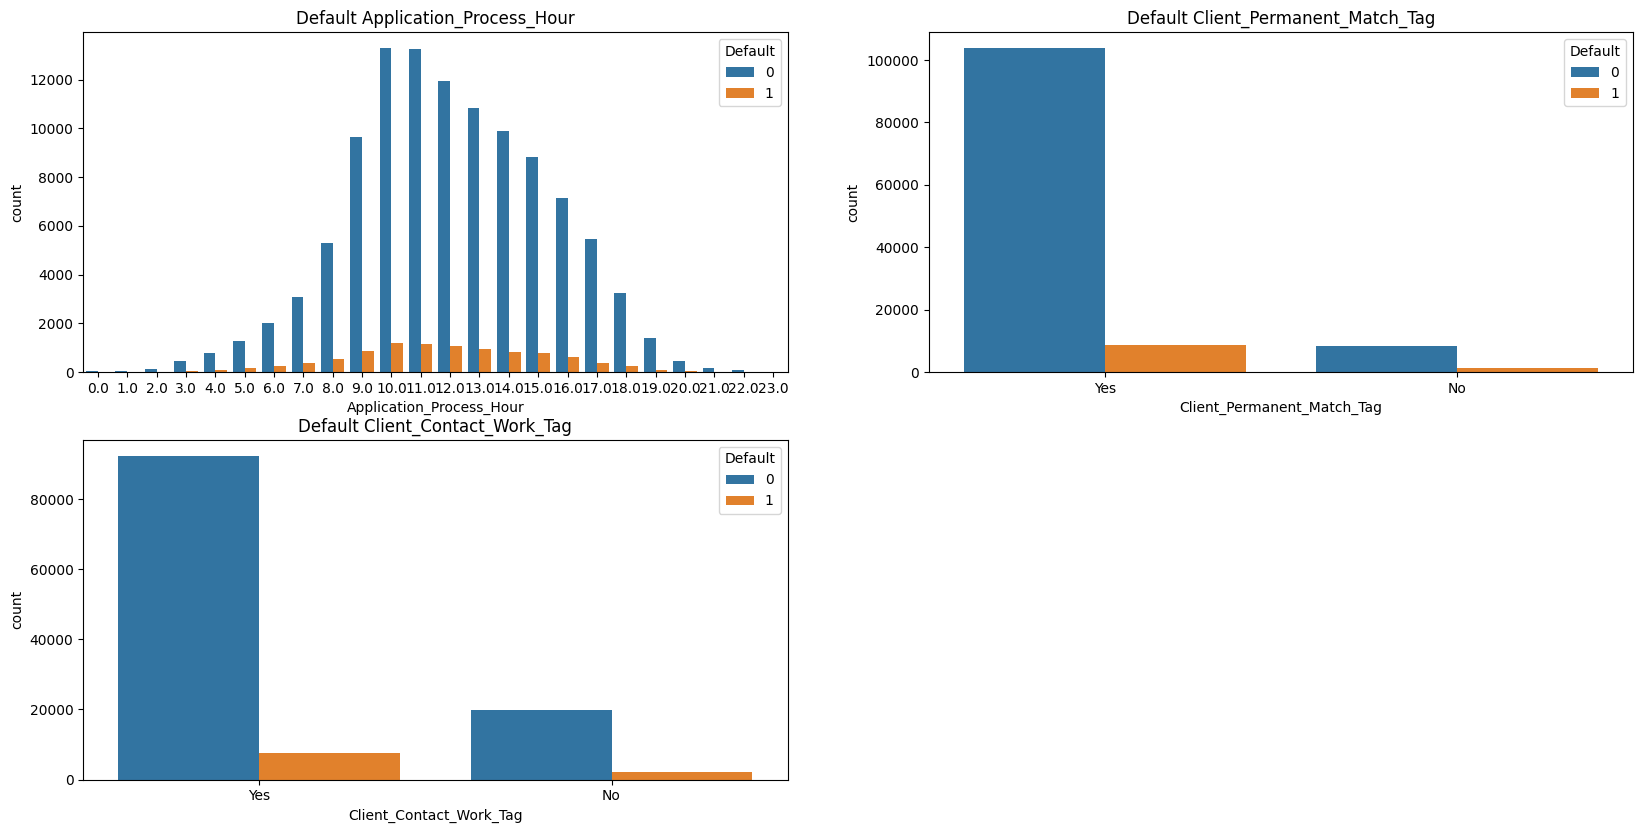

In [26]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[18:21]:
    plt.subplot(3,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


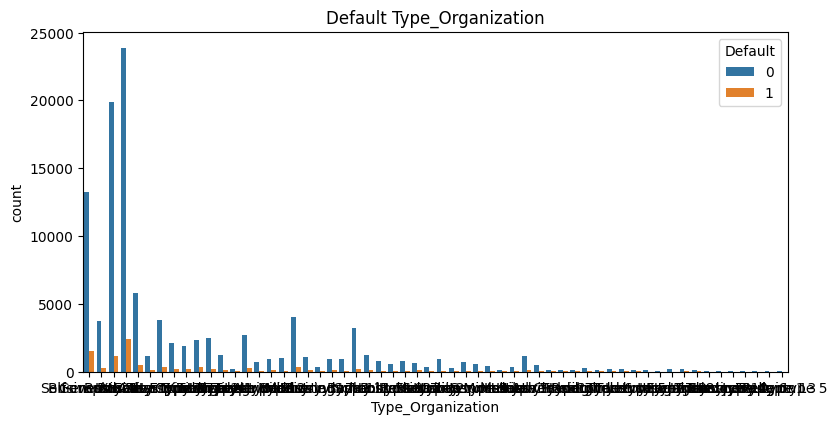

In [27]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[21:]:
    plt.subplot(3,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()
